# IPL Match Predictions 

In [210]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Saving model
import joblib

In [211]:
data = pd.read_csv(r"C:\Users\Yash\Downloads\Reinforcement ML\ipl_matches.csv")
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [212]:
# Copying the Data 
ipl = data.copy()
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [213]:
# First 10 rows in ipl
ipl.head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,9/4/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,9/4/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,IPL-2017,Indore,10/4/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,IPL-2017,Pune,11/4/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,IPL-2017,Mumbai,12/4/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [214]:
# Last 10 rows in ipl
ipl.tail(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
746,11342,IPL-2019,Mumbai,2/5/2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore
747,11343,IPL-2019,Mohali,3/5/2019,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,S Gill,IS Bindra Stadium,Bruce Oxenford,C Shamshuddin,KN Ananthapadmanabhan
748,11344,IPL-2019,Delhi,4/5/2019,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon
749,11345,IPL-2019,Bengaluru,4/5/2019,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Ulhas Gandhe
750,11346,IPL-2019,Mohali,5/5/2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12/5/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [215]:
ipl.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

## DATA CLEANING

In [216]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [217]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [218]:
# whether null values present or not.
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [219]:
# Percentage of Null values
null_percentage = (ipl.isnull().sum() / len(ipl)) * 100
null_percentage

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [220]:
# Define the replacement dictionary
team_replacements = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Delhi Daredevils": "Delhi Capitals",
}

# Apply replacements to both team1 and team2 columns
ipl['team1'] = ipl['team1'].replace(team_replacements)
ipl['team2'] = ipl['team2'].replace(team_replacements)
ipl['winner'] = ipl['winner'].replace(team_replacements)
ipl['toss_winner'] = ipl['toss_winner'].replace(team_replacements)

In [221]:
columns_to_update = ['team1', 'team2', 'winner', 'toss_winner']

for col in columns_to_update:
    data[col] = data[col].replace(team_replacements)

In [222]:
# Drop rows with no winner
ipl.dropna(subset=['winner'], inplace=True)
ipl.fillna('Unknown', inplace=True)

In [223]:
# Drop irrelevant columns
ipl.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, errors='ignore', inplace=True)

In [237]:
ipl['is_toss_winner'] = (ipl['toss_winner'] == ipl['team1']).astype(int)
ipl['batting_first'] = (ipl['toss_decision'] == 'bat').astype(int)

### Checking for outliers

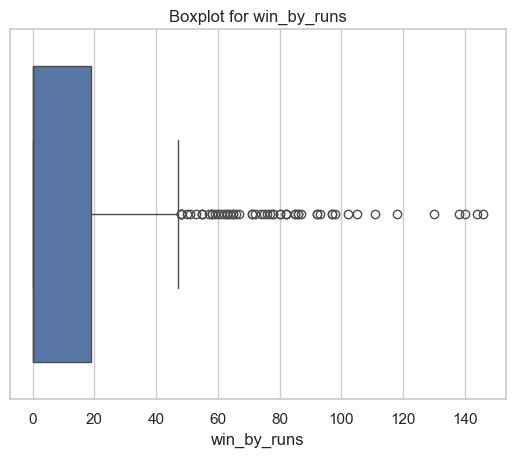

In [224]:
sns.boxplot(x=ipl['win_by_runs'])
plt.title('Boxplot for win_by_runs')
plt.show()

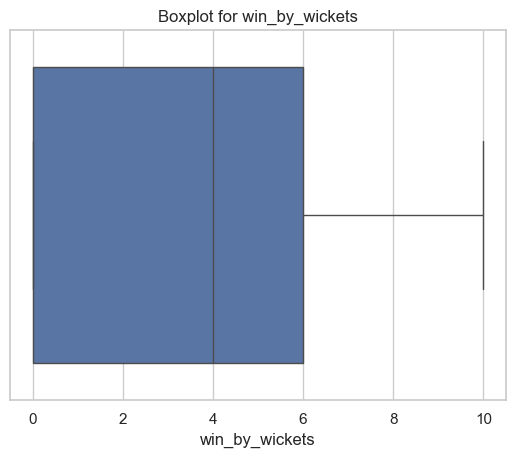

In [225]:
sns.boxplot(x=ipl['win_by_wickets'])
plt.title('Boxplot for win_by_wickets')
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

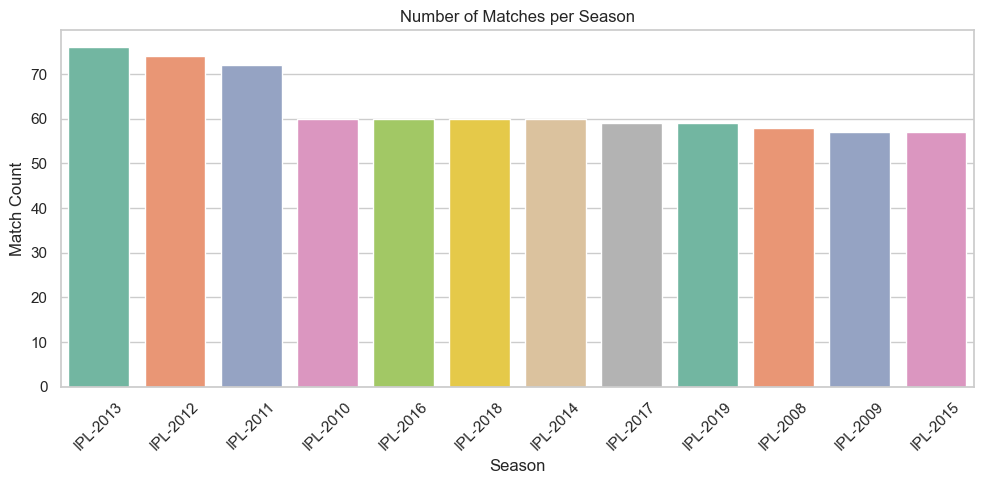

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=ipl, x='Season', order=ipl['Season'].value_counts().index, palette='Set2')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

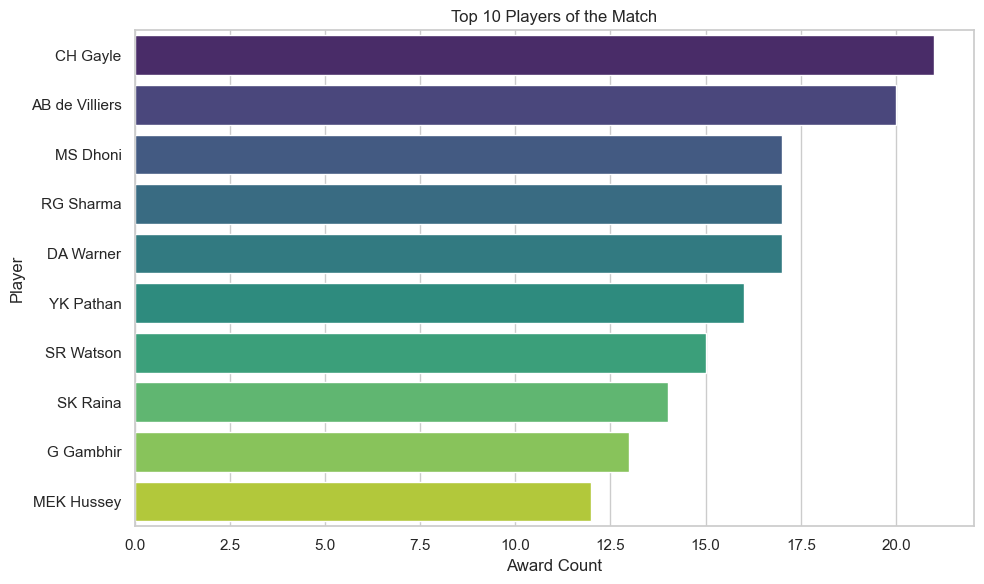

In [231]:
plt.figure(figsize=(10, 6))
top10 = ipl['player_of_match'].value_counts().nlargest(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Players of the Match')
plt.xlabel('Award Count')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

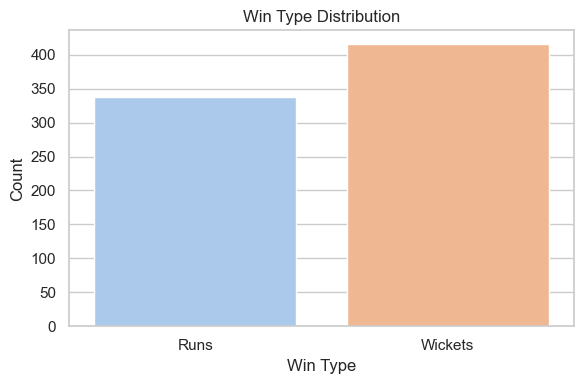

In [232]:
# 1.3 Win Type Distribution
ipl['win_type'] = ipl.apply(lambda r: 'Runs' if r['win_by_runs']>0 else 'Wickets', axis=1)
plt.figure(figsize=(6,4))
sns.countplot(data=ipl, x='win_type', palette='pastel')
plt.title('Win Type Distribution')
plt.xlabel('Win Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

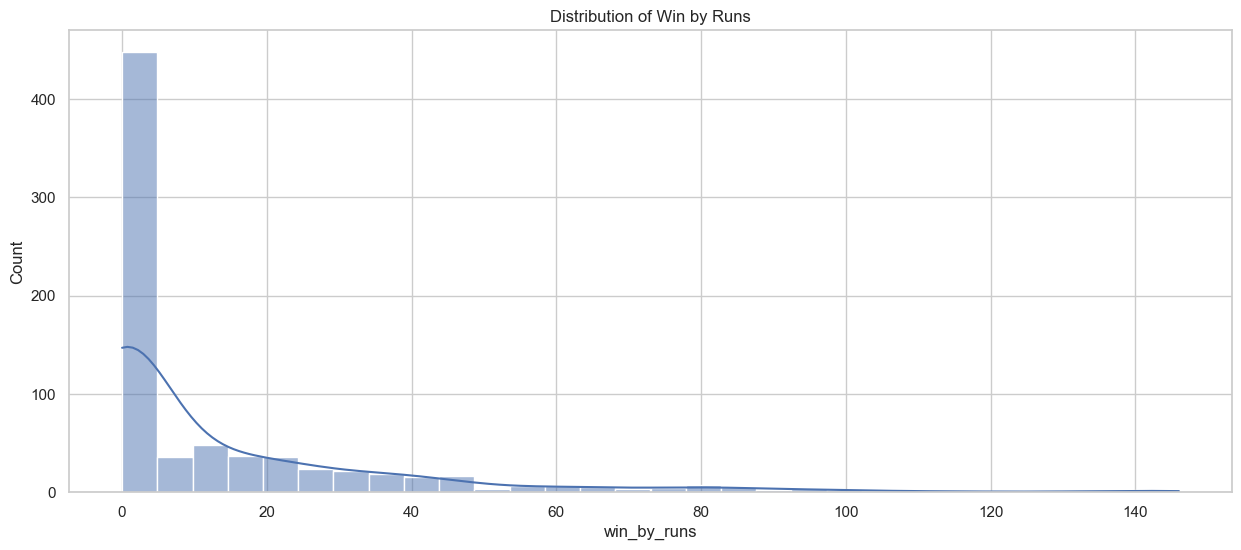

In [233]:
# Distribution of Win by Runs
plt.figure(figsize=(15,6))
sns.histplot(ipl['win_by_runs'], kde=True, bins=30)
plt.title('Distribution of Win by Runs')
plt.show()

### Bi-Variate Analysis

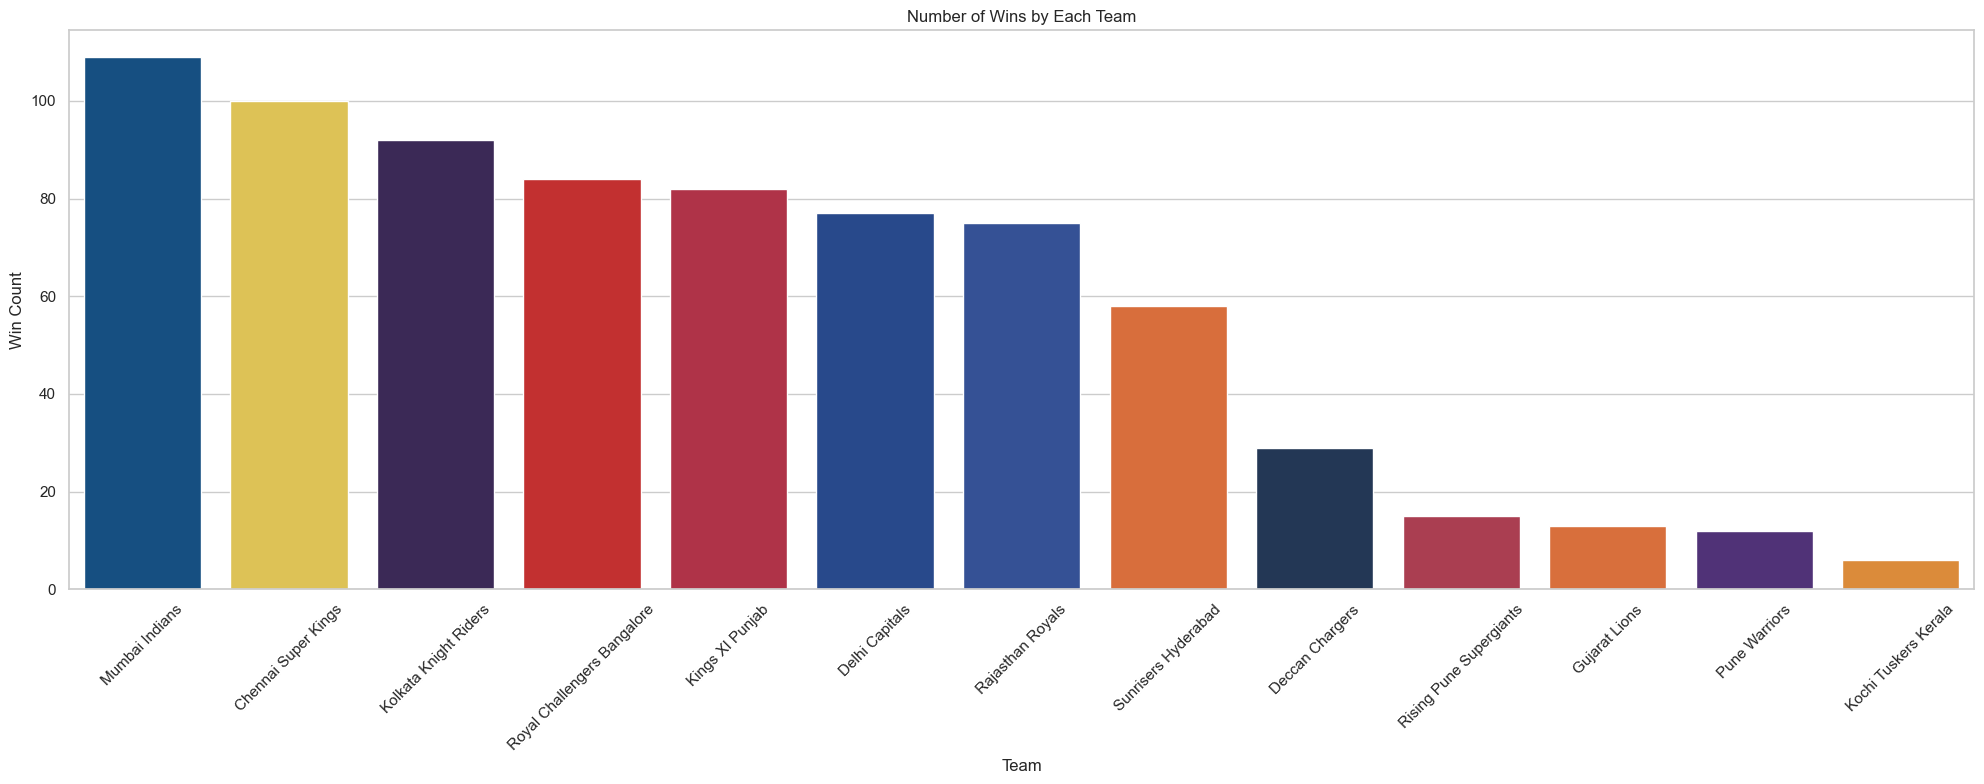

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define final team color palette
ipl_colors = {
    'Mumbai Indians': '#045093',
    'Chennai Super Kings': '#F4D03F',
    'Kolkata Knight Riders': '#3A225D',
    'Royal Challengers Bangalore': '#DA1818',
    'Kings XI Punjab': '#C41E3A',
    'Rajasthan Royals': '#254AA5',
    'Delhi Capitals': '#17449B',
    'Sunrisers Hyderabad': '#F26522',
    'Deccan Chargers': '#1B365D',
    'Gujarat Lions': '#F26622',
    'Pune Warriors': '#4F2683',
    'Rising Pune Supergiants': '#BC2C45',
    'Kochi Tuskers Kerala': '#F68B1F'
}

# Order by win count
team_order = data['winner'].value_counts().index.tolist()

# Build palette in order
palette = [ipl_colors.get(team, '#333333') for team in team_order]

# Plot
plt.figure(figsize=(20, 8))
sns.countplot(x='winner', data=data, order=team_order, palette=palette)
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Win Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

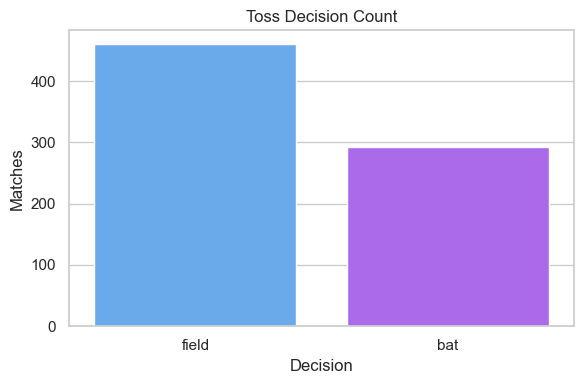

In [235]:
# 2.1 Toss Decision vs Matches
plt.figure(figsize=(6,4))
sns.countplot(data=ipl, x='toss_decision', palette='cool')
plt.title('Toss Decision Count')
plt.xlabel('Decision')
plt.ylabel('Matches')
plt.tight_layout()
plt.show()

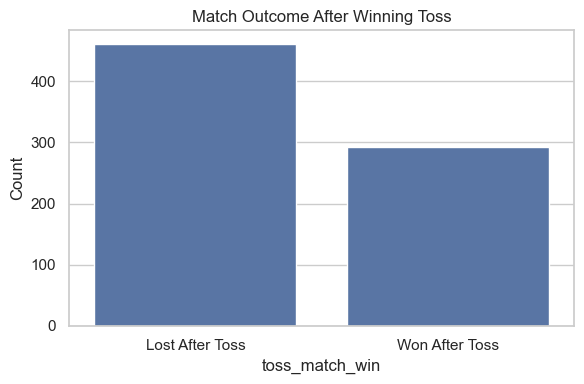

In [238]:
# 2.2 Does Toss Win Help?
ipl['toss_match_win'] = ipl['is_toss_winner'] == 1
plt.figure(figsize=(6,4))
sns.countplot(x=ipl['toss_match_win'])
plt.xticks([0,1], ['Lost After Toss','Won After Toss'])
plt.title('Match Outcome After Winning Toss')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

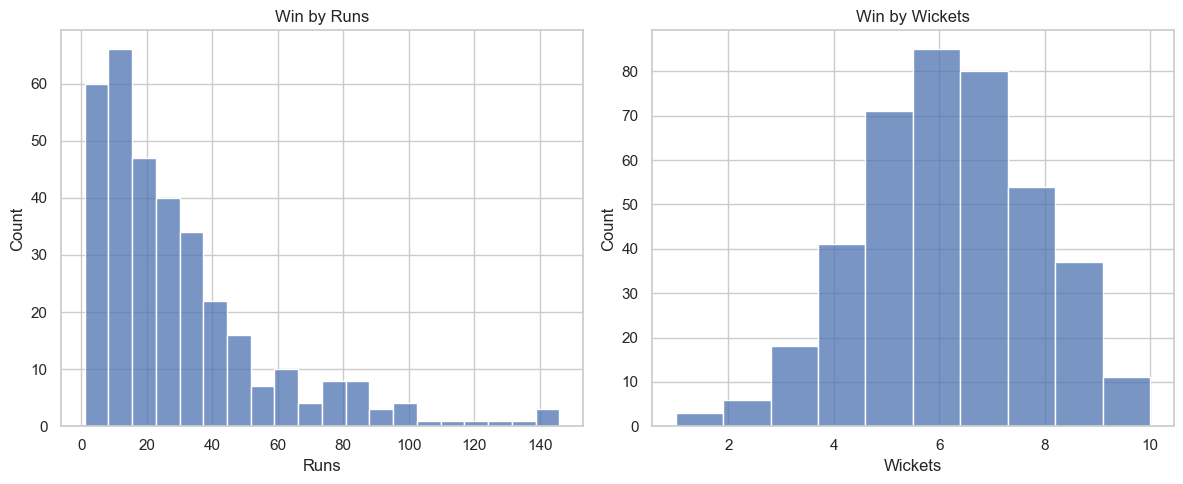

In [239]:
# 2.3 Win Margin Distributions
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ipl.loc[ipl['win_by_runs']>0,'win_by_runs'], bins=20, ax=axes[0])
axes[0].set_title('Win by Runs')
axes[0].set_xlabel('Runs')
axes[0].set_ylabel('Count')
sns.histplot(ipl.loc[ipl['win_by_wickets']>0,'win_by_wickets'], bins=10, ax=axes[1])
axes[1].set_title('Win by Wickets')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

### Multivariant Analysis

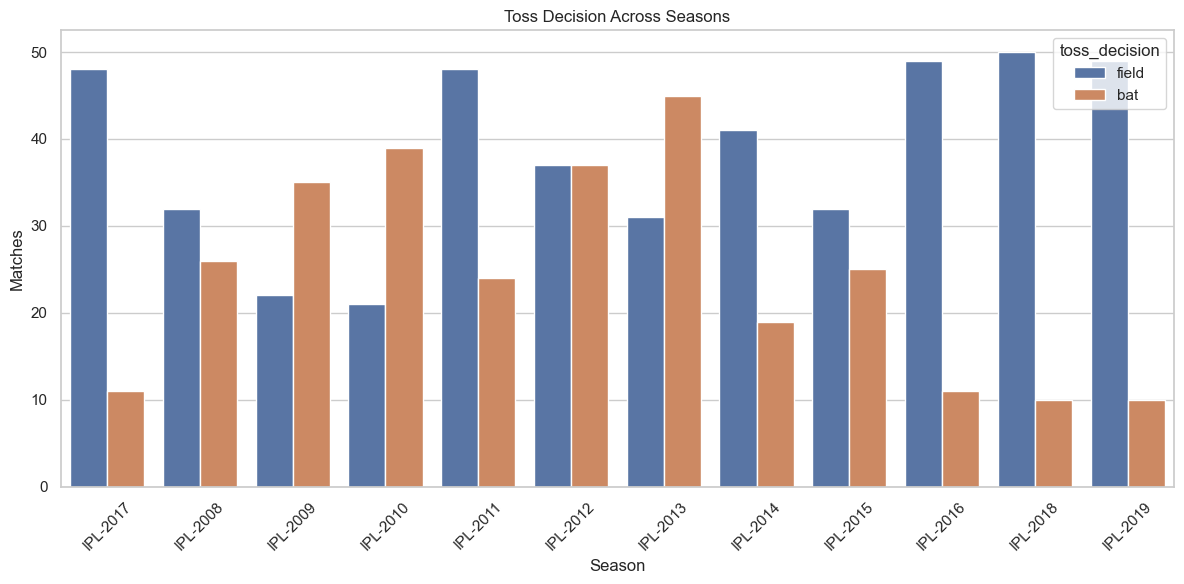

In [245]:
# 3.1 Toss Decision by Season
plt.figure(figsize=(12,6))
sns.countplot(data=ipl, x='Season', hue='toss_decision')
plt.title('Toss Decision Across Seasons')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

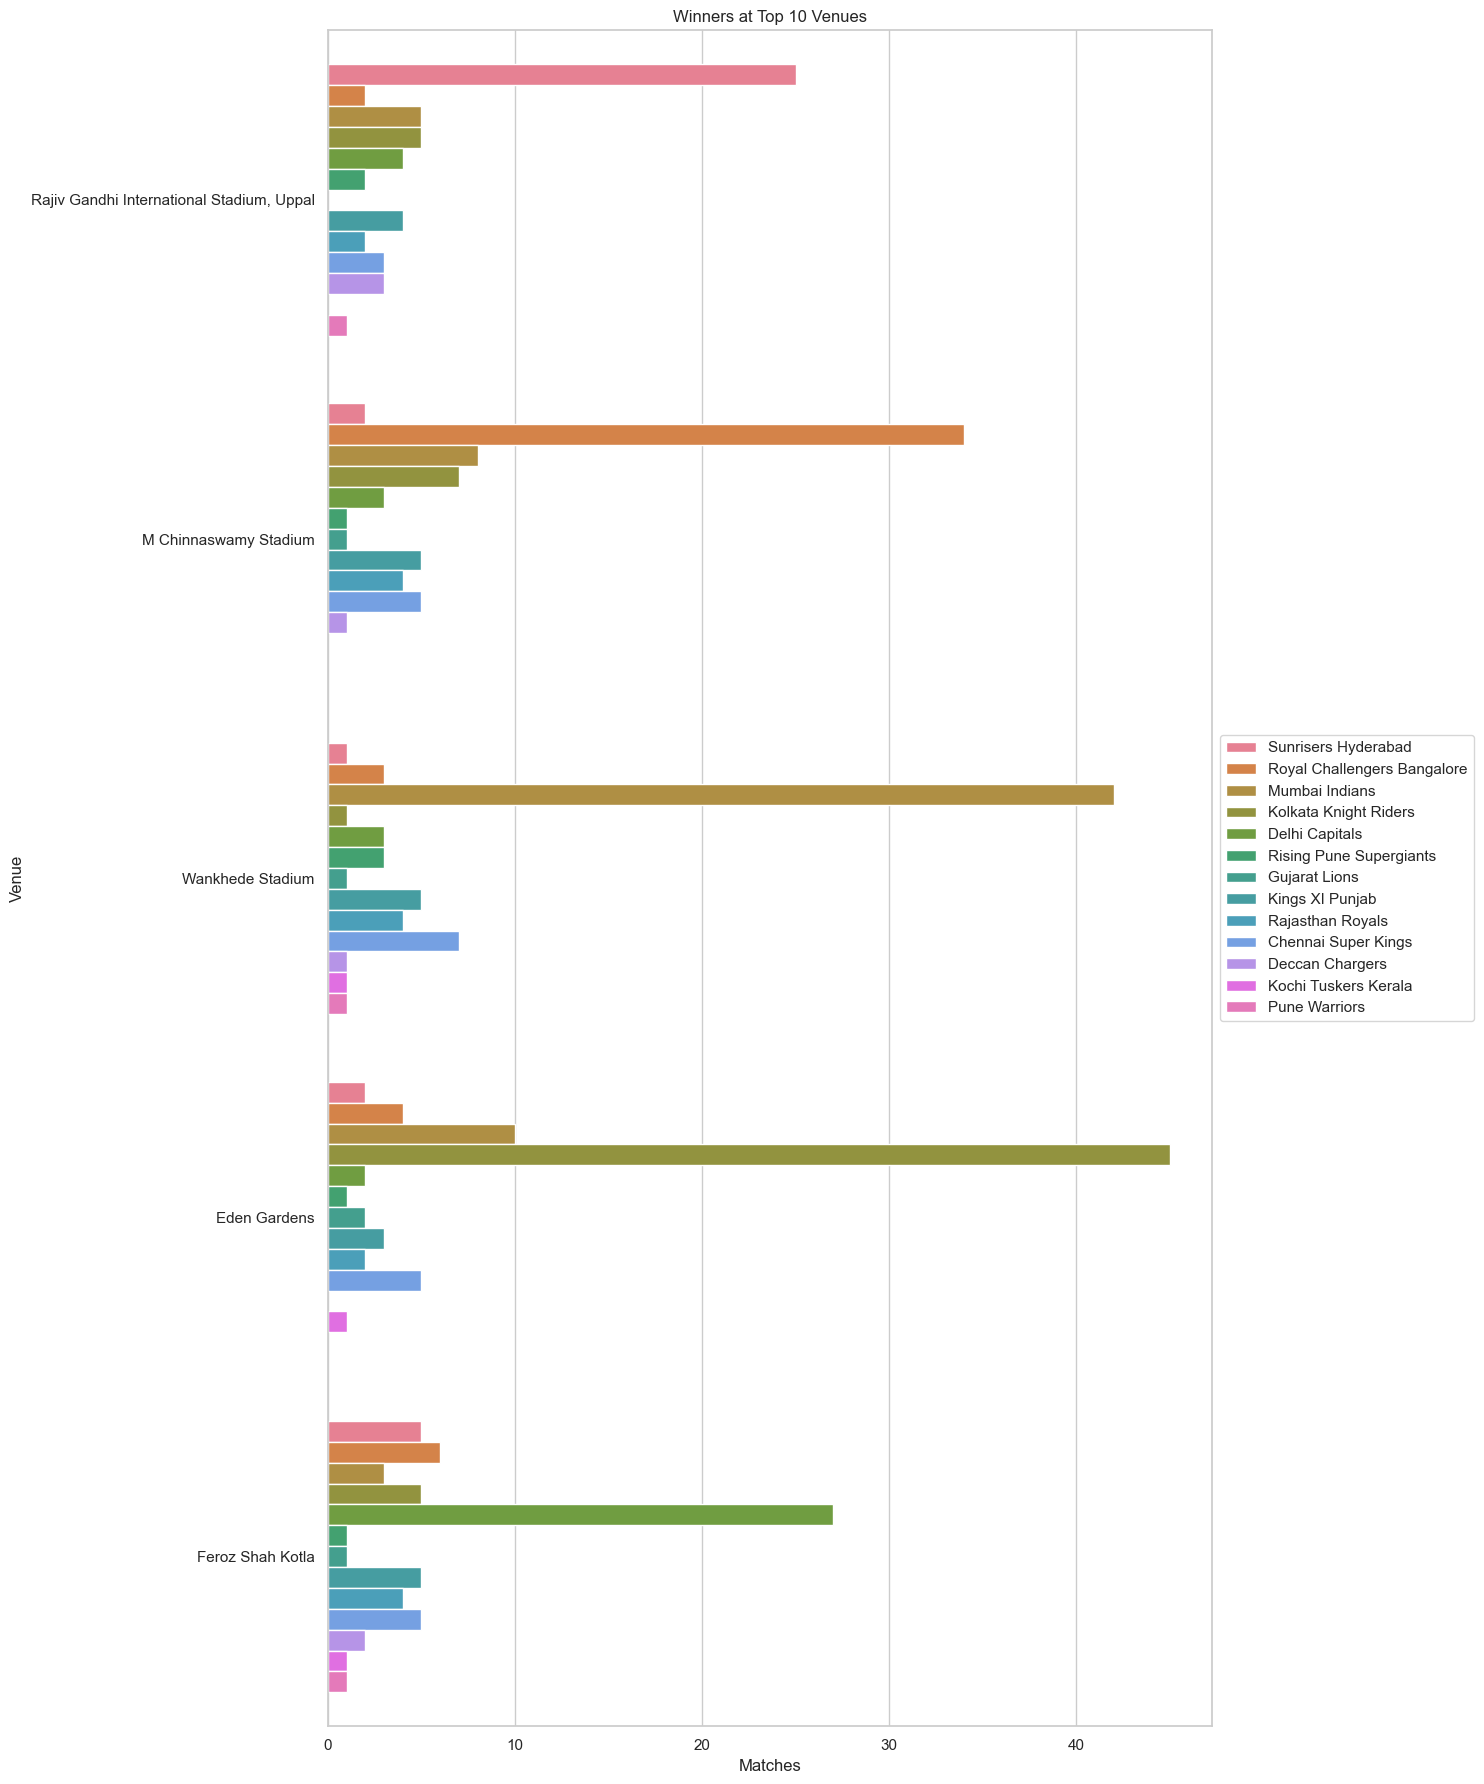

In [247]:
# 3.2 Winners at Top 10 Venues
top_venues = ipl['venue'].value_counts().nlargest(5).index

plt.figure(figsize=(15,18))
sns.countplot(
    data=ipl[ipl['venue'].isin(top_venues)],   # <-- correct filter
    y='venue',
    hue='winner'
)
plt.title('Winners at Top 10 Venues')
plt.xlabel('Matches')
plt.ylabel('Venue')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.show()

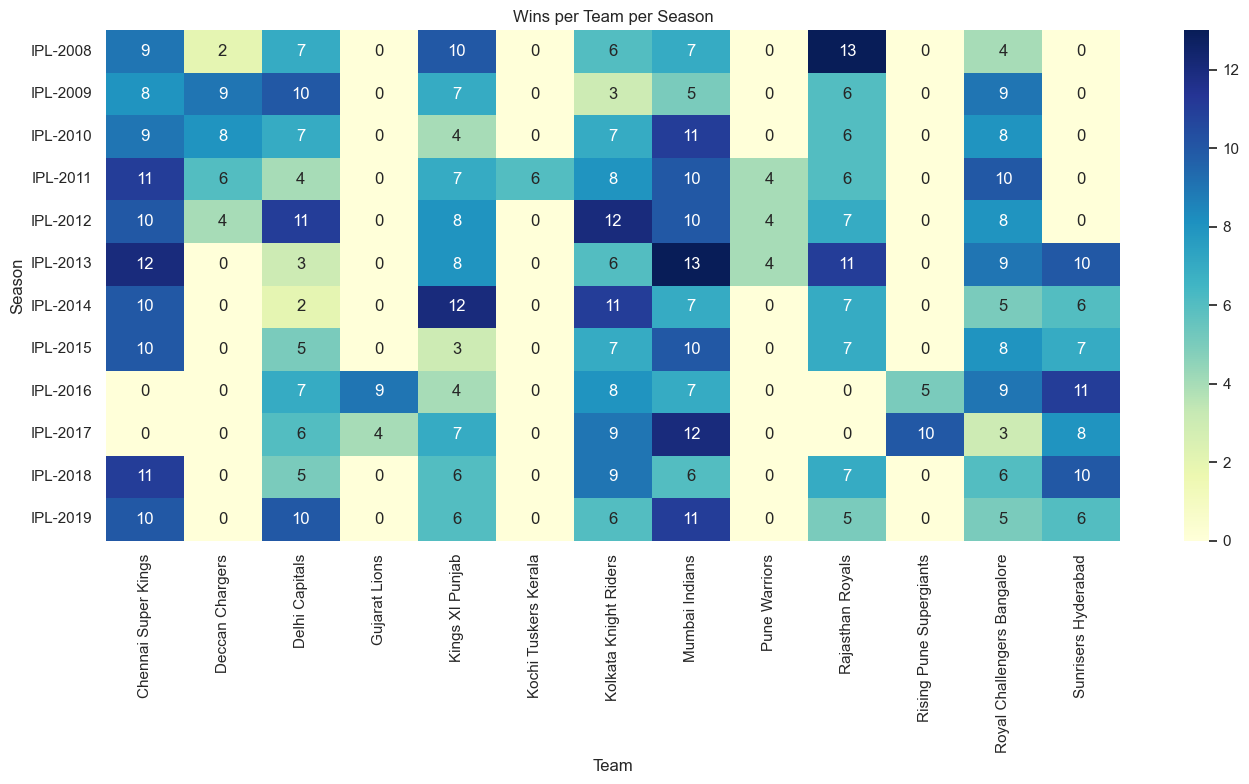

In [248]:
# 3.3 Heatmap of Wins per Team per Season
heat = ipl.groupby(['Season','winner']).size().unstack(fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(heat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wins per Team per Season')
plt.xlabel('Team')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

# Fixing the values

In [249]:
# Fix 'season' column if needed
if 'season' in ipl.columns and ipl['season'].dtype == 'object':
    ipl['season'] = ipl['season'].str.extract(r'(\d+)', expand=False).astype(int)

In [250]:
# Separate target before encoding
target = ipl['winner']
ipl.drop(['winner'], axis=1, inplace=True)

### Label Encoder and hot Label Encoder

In [253]:
categorical_cols = ipl.select_dtypes(include='object').columns.tolist()
ipl = pd.get_dummies(ipl, columns=categorical_cols, drop_first=True)

In [254]:
# Encode the target
le = LabelEncoder()
y = le.fit_transform(target)
X = ipl

## Training Models

### using StratifiedShuffleSplit to train and model efficiently and equally

In [255]:
Stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in Stratified.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [256]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

### Logistic Regression

In [257]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Logistic Regression Accuracy: 0.7351
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.57      0.67      0.62         6
           2       0.67      0.53      0.59        15
           3       0.75      1.00      0.86         3
           4       0.86      0.75      0.80        16
           5       1.00      1.00      1.00         1
           6       0.85      0.89      0.87        19
           7       0.78      0.64      0.70        22
           8       0.00      0.00      0.00         2
           9       0.52      0.73      0.61        15
          10       0.50      0.67      0.57         3
          11       0.81      0.76      0.79        17
          12       0.82      0.75      0.78        12

    accuracy                           0.74       151
   macro avg       0.68      0.71      0.69       151
weighted avg       0.74      0.74      0.73       151

Confusion Matrix:


### SVM

In [258]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

SVM Accuracy: 0.6887
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       1.00      0.33      0.50         6
           2       0.54      0.47      0.50        15
           3       1.00      0.67      0.80         3
           4       0.54      0.81      0.65        16
           5       0.00      0.00      0.00         1
           6       0.85      0.89      0.87        19
           7       0.65      0.68      0.67        22
           8       0.00      0.00      0.00         2
           9       0.69      0.73      0.71        15
          10       0.33      0.33      0.33         3
          11       0.71      0.71      0.71        17
          12       1.00      0.75      0.86        12

    accuracy                           0.69       151
   macro avg       0.61      0.55      0.56       151
weighted avg       0.70      0.69      0.68       151

Confusion Matrix:
 [[15  0  1  0  

### KNN

In [259]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

knn_acc = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

KNN Accuracy: 0.6159
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.80      0.57        20
           1       0.50      0.17      0.25         6
           2       0.55      0.40      0.46        15
           3       0.75      1.00      0.86         3
           4       1.00      0.50      0.67        16
           5       0.00      0.00      0.00         1
           6       0.67      0.74      0.70        19
           7       0.71      0.68      0.70        22
           8       0.00      0.00      0.00         2
           9       0.65      0.73      0.69        15
          10       0.50      0.67      0.57         3
          11       0.56      0.59      0.57        17
          12       0.78      0.58      0.67        12

    accuracy                           0.62       151
   macro avg       0.55      0.53      0.52       151
weighted avg       0.64      0.62      0.61       151

Confusion Matrix:
 [[16  0  1  0  

### Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

Decision Tree Accuracy: 0.8079
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        20
           1       1.00      0.67      0.80         6
           2       0.86      0.80      0.83        15
           3       1.00      1.00      1.00         3
           4       0.92      0.69      0.79        16
           5       0.33      1.00      0.50         1
           6       1.00      0.89      0.94        19
           7       0.96      1.00      0.98        22
           8       0.33      0.50      0.40         2
           9       0.92      0.73      0.81        15
          10       0.50      0.67      0.57         3
          11       0.83      0.88      0.86        17
          12       0.70      0.58      0.64        12

    accuracy                           0.81       151
   macro avg       0.76      0.79      0.75       151
weighted avg       0.84      0.81      0.81       151

Confusion Matrix:
 [[16 

### Random Forest

In [261]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Accuracy: 0.8609
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.62      0.83      0.71         6
           2       0.93      0.87      0.90        15
           3       1.00      1.00      1.00         3
           4       0.93      0.81      0.87        16
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        19
           7       0.74      0.91      0.82        22
           8       1.00      0.50      0.67         2
           9       0.78      0.93      0.85        15
          10       0.75      1.00      0.86         3
          11       0.94      0.88      0.91        17
          12       0.91      0.83      0.87        12

    accuracy                           0.86       151
   macro avg       0.88      0.86      0.86       151
weighted avg       0.87      0.86      0.86       151

Confusion Matrix:
 [[13 

### XGBoost

In [262]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

XGBoost Accuracy: 0.9669
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      1.00      1.00         6
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        16
           5       0.00      0.00      0.00         1
           6       0.95      1.00      0.97        19
           7       1.00      1.00      1.00        22
           8       0.67      1.00      0.80         2
           9       0.94      1.00      0.97        15
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00        17
          12       0.92      1.00      0.96        12

    accuracy                           0.97       151
   macro avg       0.88      0.89      0.88       151
weighted avg       0.96      0.97      0.96       151

Confusion Matrix:
 [[17  0  0 

## Model Performance

In [263]:
# Create a DataFrame from the accuracy results dictionary
results = {
    'Logistic Regression': lr_acc,
    'SVM': svm_acc,
    'KNN': knn_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'XGBoost': xgb_acc
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

print("\nModel Performance:\n", results_df)


Model Performance:
                      Accuracy
XGBoost              0.966887
Random Forest        0.860927
Decision Tree        0.807947
Logistic Regression  0.735099
SVM                  0.688742
KNN                  0.615894


### Best Performing Model

In [264]:
best_model_name = results_df.index[0]
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: XGBoost


## Hypertuning Best Performance Model 

In [265]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    param_grid=xgb_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 150]},
             verbose=1)

In [266]:
# Retrieve the best XGBoost model after tuning
best_xgb_model = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best XGBoost Parameters: {'max_depth': 3, 'n_estimators': 100}


In [267]:
## Checking the Tuning Model

In [268]:
# Predict on test data
xgb_preds = best_xgb_model.predict(X_test)

In [269]:
# Evaluate performance
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"\nTuned XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


Tuned XGBoost Accuracy: 0.9735
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      1.00      1.00         6
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        16
           5       0.00      0.00      0.00         1
           6       0.95      1.00      0.97        19
           7       1.00      1.00      1.00        22
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00        15
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00        17
          12       0.92      1.00      0.96        12

    accuracy                           0.97       151
   macro avg       0.88      0.89      0.88       151
weighted avg       0.97      0.97      0.97       151

Confusion Matrix:
 [[18

In [270]:
print(f"\nTuned XGBoost Accuracy: {xgb_acc:.4f}")


Tuned XGBoost Accuracy: 0.9735


## Save the Model

In [271]:
# Save the tuned XGBoost model
joblib.dump(best_xgb_model, 'best_xgboost_model.pkl')

['best_xgboost_model.pkl']